In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

In [2]:
dataset = pd.read_csv('data/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
#dummify the State feature
state_dummies = pd.get_dummies(dataset['State'])
dataset.drop(['State'], axis=1, inplace=True)
#avoid the dummy variable trap and exclude one of the dummy variables
dataset[state_dummies.columns[:-1]] = state_dummies[state_dummies.columns[:-1]]

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [5]:
# splitting the dataset into train/test
from sklearn.model_selection import train_test_split
features = dataset.columns.drop('Profit')
X_train, X_test, Y_train, Y_test = train_test_split(dataset[features], dataset['Profit'], test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(40, 5) (10, 5) (40,) (10,)


In [6]:
# fit the multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
lr.score(X_test, Y_test)

0.9347068473294996

In [8]:
# predict results on test set
y_pred = lr.predict(X_test)

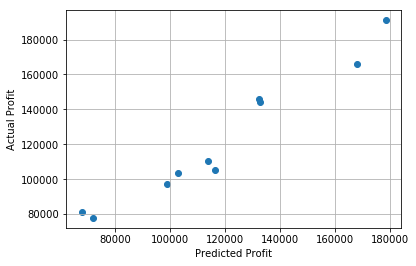

In [9]:
plt.scatter(y_pred, Y_test)
plt.xlabel('Predicted Profit')
plt.ylabel('Actual Profit')
plt.grid()

## Begin Backward Elimination Feature Selection
First, need to add a column of ones to represent $x_0$ in the multiple linear regression equation:

$y = b_0x_0 + b_1x_1 + ... + b_nx_n$

In [10]:
# begin backward elimination
import statsmodels.formula.api as sm
dataset['x0'] = 1
dataset = dataset[dataset.columns[::-1]]

In [11]:
dataset.head()

,x0,Florida,California,Profit,Marketing Spend,Administration,R&D Spend
0,1,0,0,192261.83,471784.10,136897.80,165349.20
1,1,0,1,191792.06,443898.53,151377.59,162597.70
2,1,1,0,191050.39,407934.54,101145.55,153441.51
3,1,0,0,182901.99,383199.62,118671.85,144372.41
4,1,1,0,166187.94,366168.42,91391.77,142107.34


In [12]:
features = dataset.columns.drop('Profit')
regressor_OLS = sm.OLS(endog=dataset['Profit'], exog=dataset[features]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 26 May 2017   Prob (F-statistic):           1.34e-27
Time:                        05:24:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
Florida           240.6758   3338.857      0.072      0.943   -6488.349    6969.701
California         41.8870   3256.039      0.013      0.990   -6520.229    6604.003
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# take out highest p value (California) and try again
features = features.drop('California')
regressor_OLS = sm.OLS(endog=dataset['Profit'], exog=dataset[features]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 26 May 2017   Prob (F-statistic):           8.49e-29
Time:                        05:24:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
Florida           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# take out highest p values (Florida and try again)
features = features.drop('Florida')
regressor_OLS = sm.OLS(endog=dataset['Profit'], exog=dataset[features]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 26 May 2017   Prob (F-statistic):           4.53e-30
Time:                        05:24:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Admin pvalue still over 0.05, take it out and try again
features = features.drop('Administration')
regressor_OLS = sm.OLS(endog=dataset['Profit'], exog=dataset[features]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 26 May 2017   Prob (F-statistic):           2.16e-31
Time:                        05:24:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Marketing spend is still slightly above pvalue threshold (0.05) take it out and check adjusted r^2
features = features.drop('Marketing Spend')
regressor_OLS = sm.OLS(endog=dataset['Profit'], exog=dataset[features]).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 26 May 2017   Prob (F-statistic):           3.50e-32
Time:                        05:24:09   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0          4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#adjusted r^2 went down, need to add Marketing Spend back in
features = features.append(pd.Index(['Marketing Spend']))
features = features.drop('x0')

In [18]:
dataset[features].head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [19]:
# now redo the train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset[features], dataset['Profit'], test_size=0.2, random_state=0)

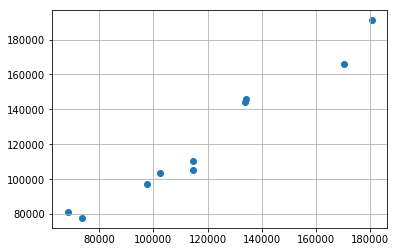

In [20]:
# make the model again
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
plt.scatter(y_pred, Y_test)
plt.grid()
plt.show()

In [21]:
model.score(X_test, Y_test)

0.9474386447268488

Model score increased by a little more than 1%